# StockY

# Stock Price Prediction with Linear Regression

To answer the question that can we predict stock prices accurately over time, we will be using stock price data from the Quandl API and apply regression analysis method to find the answer

## Check out the data

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import quandl
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure',figsize=(16,10))
plt.rc('lines',markersize=4)

### Configure Quandl

In [2]:
#Configuring Quandl 
#And API Auth
quandl.ApiConfig.api_key = "KwYB5v_gyJcC_KnHVinu"

### Get the data

In [3]:
#Start and end date for the stock prices
start_date = datetime.date(2009,3,8)
end_date = datetime.date.today()
data = quandl.get('FSE/SAP_X', start_date=start_date, end_date=end_date)
#Save the data to a file(csv)
data.to_csv('data/sap_stock.csv')

In [4]:
data.head()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,None,None,NaN
2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,None,None,NaN
2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,None,None,NaN
2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,None,None,NaN
2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,None,None,NaN


In [5]:
#Check the data types in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2988 entries, 2009-03-09 to 2020-12-01
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   2648 non-null   float64
 1   High                   2981 non-null   float64
 2   Low                    2981 non-null   float64
 3   Close                  2988 non-null   float64
 4   Change                 11 non-null     float64
 5   Traded Volume          2942 non-null   float64
 6   Turnover               2935 non-null   float64
 7   Last Price of the Day  0 non-null      object 
 8   Daily Traded Units     0 non-null      object 
 9   Daily Turnover         7 non-null      float64
dtypes: float64(8), object(2)
memory usage: 256.8+ KB


In [6]:
#Getting some descriptive statistics summary of the data set
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Daily Turnover
count,2648.000000,2981.000000,2981.000000,2988.000000,11.000000,2.942000e+03,2.935000e+03,7.0
mean,65.991424,69.757746,68.509819,69.079700,-0.070000,3.158713e+06,1.953571e+08,0.0
std,28.013445,28.198972,27.681073,27.983287,0.709761,2.026167e+06,1.205243e+08,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,7.936064e+04,0.0
25%,43.492500,45.800000,44.760000,44.970000,-0.500000,2.027710e+06,1.314660e+08,0.0
50%,58.735000,61.500000,60.640000,61.000000,-0.290000,2.711029e+06,1.711970e+08,0.0
75%,82.350000,92.240000,90.620000,91.422500,0.085000,3.767555e+06,2.263262e+08,0.0
max,142.800000,143.240000,141.080000,142.340000,1.250000,3.645671e+07,1.376505e+09,0.0


In [7]:
#Display features in data set
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover',
       'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'],
      dtype='object')

### Select Subset with relevant features

We use the daily closing price **Close** as the value to predict, so we can discard the other features.

* 'Close' column has numerical data type
* The 'Date' is the index column and contains datetime values

In [8]:
#Creating a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Close'])

#Resetting the index column
df = df.reset_index()

In [9]:
print(df)

           Date   Close
0    2009-03-09   25.59
1    2009-03-10   26.87
2    2009-03-11   26.64
3    2009-03-12   26.18
4    2009-03-13   25.73
...         ...     ...
2983 2020-11-25   99.04
2984 2020-11-26   99.74
2985 2020-11-27  100.10
2986 2020-11-30  101.70
2987 2020-12-01  101.90

[2988 rows x 2 columns]


In [10]:
df.head()

,Date,Close
0,2009-03-09,25.59
1,2009-03-10,26.87
2,2009-03-11,26.64
3,2009-03-12,26.18
4,2009-03-13,25.73


In [11]:
df.shape

(2988, 2)

In [12]:
#Again checking the data types in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2988 non-null   datetime64[ns]
 1   Close   2988 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 46.8 KB


In [13]:
#Checking for any missing values which might affect our calculations
df.isna().values.any()

False

## Explore the Data

When we take a look at the price movement over time by simply plotting the *Closing Price* vs *Time*, we can already see, that the price continously increases over time and we can also estimate that trend could be linear.

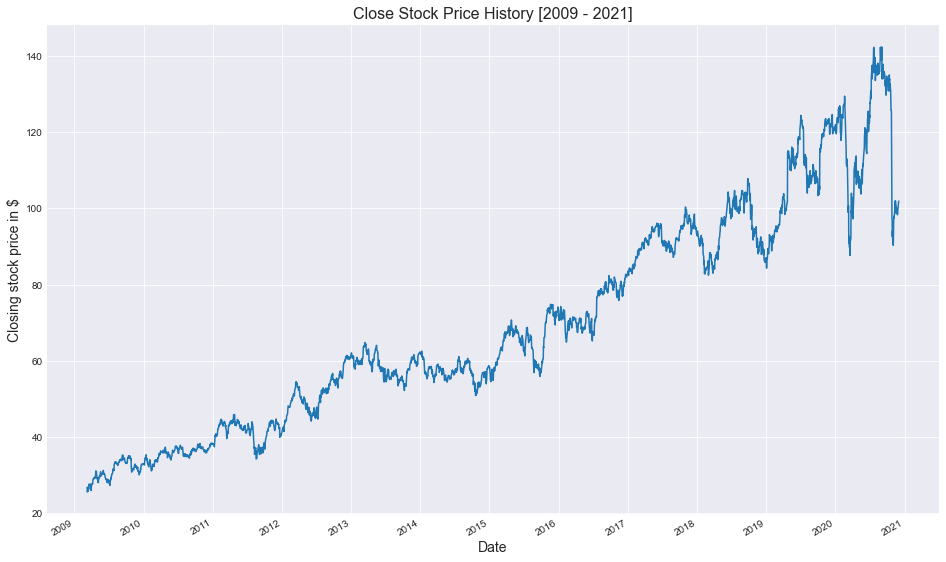

In [14]:
#Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')

#Creating subplots
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

#Formatting the plot
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

plt.title('Close Stock Price History [2009 - 2021]', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing stock price in $', fontsize=14)

fig.autofmt_xdate()

plt.show()

## Linear Regression

Our data contains only one **independent variable ($X$)** which represents the *data* and the **dependent variable ($Y$)** we are trying to predict is the *Stock Price*. To fit a line to the data points, which then represents an estimated relationship between $X$ and $Y$, we can use a **Simple Linear Regression**

The best fit line can be described with
$$
Y = \beta_0 + \beta_1 X
$$

where
* $Y$ is the predicted value of the dependent variable
* $\beta_0$ is the y-intercept
* $\beta_1$ is the slope
* $X$ is the value of the independent variable

The goal is to find sucj coefficients $\beta_0$ and $\beta_1$ that the **Sum of Squared Errors**, which represents the difference between each point in the data set with it's corresponding predicted value outputted model. is minimal

### Training a Linear Regression Model

### Train Test Split

In [15]:
#Package for splitting data set
from sklearn.model_selection import train_test_split

In [16]:
# Split data into train and test set : 80% / 20%
train, test = train_test_split(df, test_size=0.20)

### Create and Train the Model

In [17]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [18]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [19]:
#Create LinearRegression Object
model = LinearRegression()
#Fit linear model using the train data set
model.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

In [20]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
#The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.03118236370261765
Intercept:  22.573046871762067


<ipython-input-20-8c4236a8bab1>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model.coef_)))


Interpreting the coefficients:

* The **slope** coefficient tells us that with a 1 unit increase in **date** the **closing price** increases by 0.0312
$
* The **intercept** coefficient is the price at wich the **closing price** measurement started, the stock price value at date zero

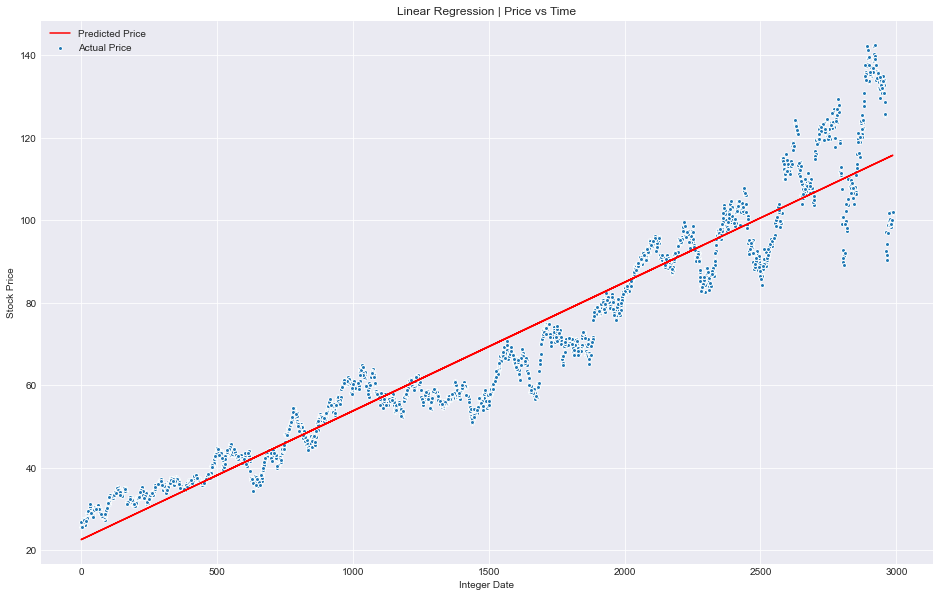

In [21]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Prediction from our Model


In [22]:
#Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [23]:
#Generate array with predicted values
y_pred = model.predict(X_test)

In [24]:
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

## Regression Evaluation

Let's have a look at how the predicted values compares with the actual value on random sample from our data set

In [25]:
# Number of rows in the data set
df.shape

(2988, 3)

In [26]:
randints = np.random.randint(2550, size=25)

#select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [27]:
df_sample.head()

,Date,Close,Prediction
22,2009-04-08,28.42,23.259059
626,2011-08-10,35.45,42.093207
833,2012-05-31,46.40,48.547956
843,2012-06-14,45.67,48.859779
874,2012-07-27,52.22,49.826433


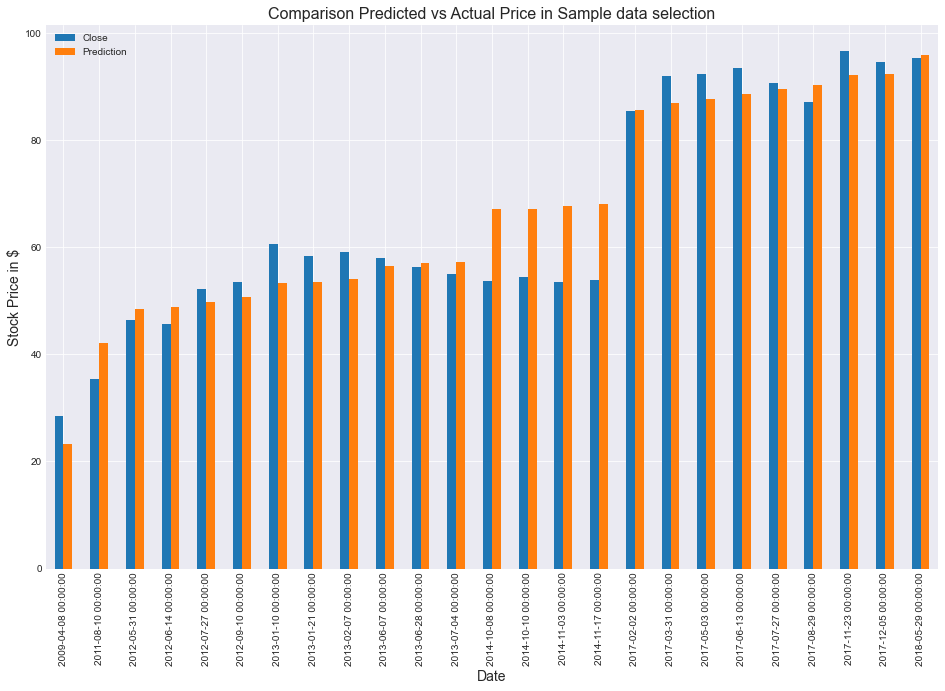

In [28]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)

plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price in $', fontsize=14)

plt.show()

We can see some larger variations between predicted and actual values in the random sample.
Let's see how the model performed over the whole data set.

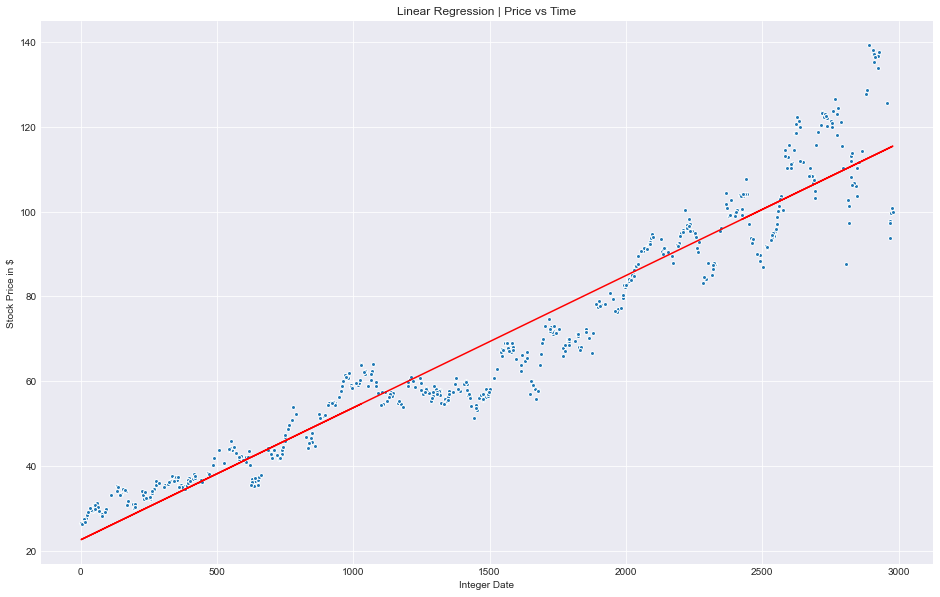

In [29]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

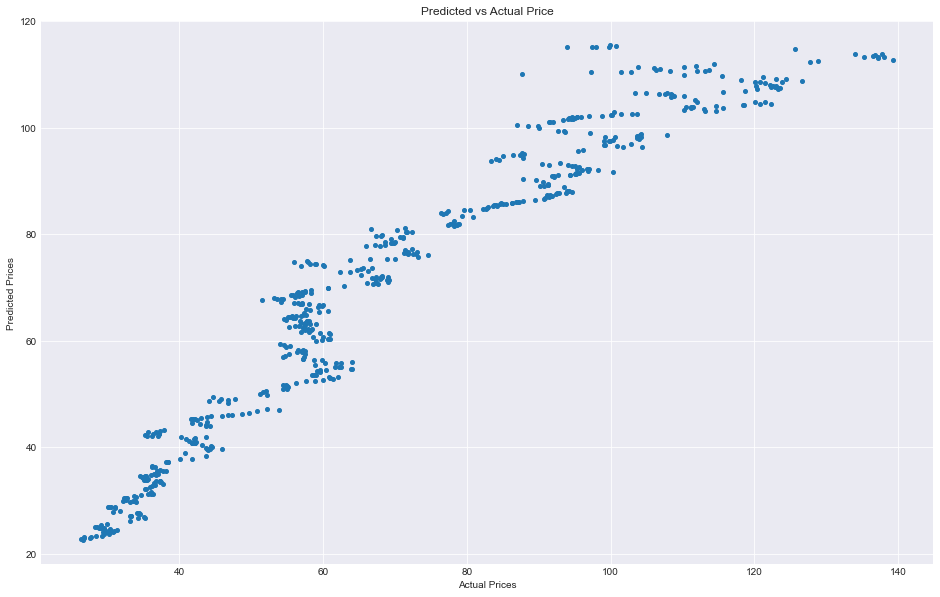

In [30]:
#Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

The data points are mostly close to diagonal, which indicates, that the predicted values are close to the actual value and the model's perfomance os largerly quite good.
Yet there are some areas, around 55 to 65, the model seems to be quite random and shows no relationship between the predicted and actual value.
Also in the area around 85 - 110 the data point are spread out quite heavily and the predictions don't cover the values above 100

#### Residual Histogram

The residuals are nearly normally distributed around zero, with a slight skewedness to the right.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


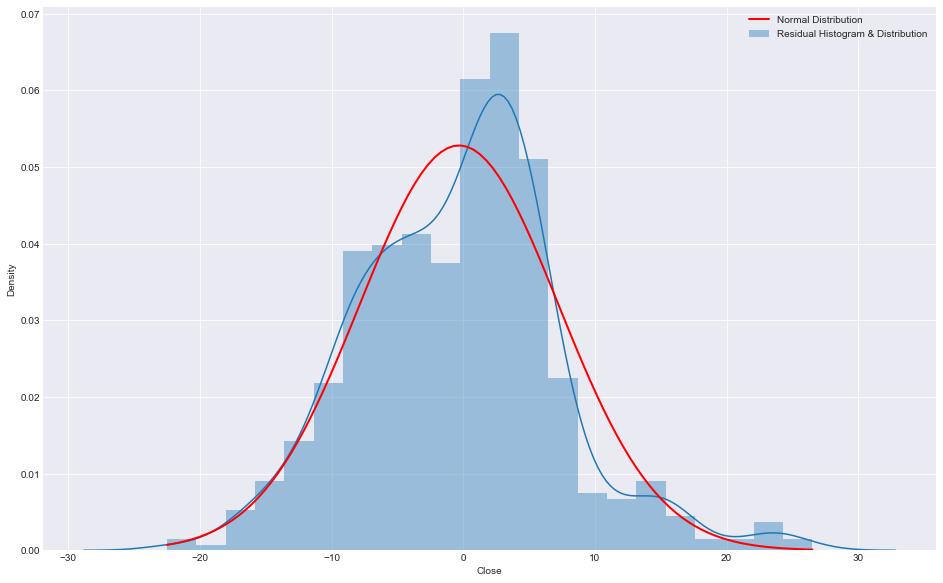

In [31]:
# Import norm package to plot normal distribution
from scipy.stats import norm

#Fit a normal distribution to the data
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution')

plt.legend()
plt.show()

### Error Evaluation Metrics

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
$$
\frac{1}{N} \sum_{i = 1}^{N} |y_i - \hat{y}_i|
$$

**Mean Squared Error (MSE)** is the mean of the squared errors:
$$
\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
$$
\sqrt{\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2}
$$

All of these are **cost functions** we want to minimize.

In [32]:
# Importing package for statistical analysis
from sklearn import metrics

In [33]:
df['Close'].describe()

count    2988.000000
mean       69.079700
std        27.983287
min        25.590000
25%        44.970000
50%        61.000000
75%        91.422500
max       142.340000
Name: Close, dtype: float64

In [34]:
# Fininding MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.905409328784333
Mean Squared Error: 57.147781592640165
Root Mean Squared Error: 7.559615174904088


* The MAE is 5% (of minimum) and 7.5% (of maximum) of the Closing Price.
* The other two errors are larger, because the errors are squared and have therefore a greater influence on the result.

### Accuracy Evaluation Metrics

To see how accurate our model is, we can calculate the **Coefficient of determination**, which describes the ratio between the total error and the error, that is explained by our model. It's value is between 0 and 1, with 1 meaning 100% of the error is acoounted for by the model. 

**Coefficient of determination**
$$
R^2 = 1 - \frac{RSS}{TSS}
$$

with  

**Residual Sum of Squares (RSS)**
$$
RSS = \sum_{i = 1}^{N} \epsilon_i^2 = \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

**Total Sum of Squares (TSS)**
$$
TSS = \sum_{i = 1}^{N} (y_i - \bar{y}_i)^2
$$

In [35]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9272403647688386


In [36]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9273714063749267

The value of $R^2$ shows that are model accounts for about 92% of the differences between the actual stock prices and the predicted prices. 